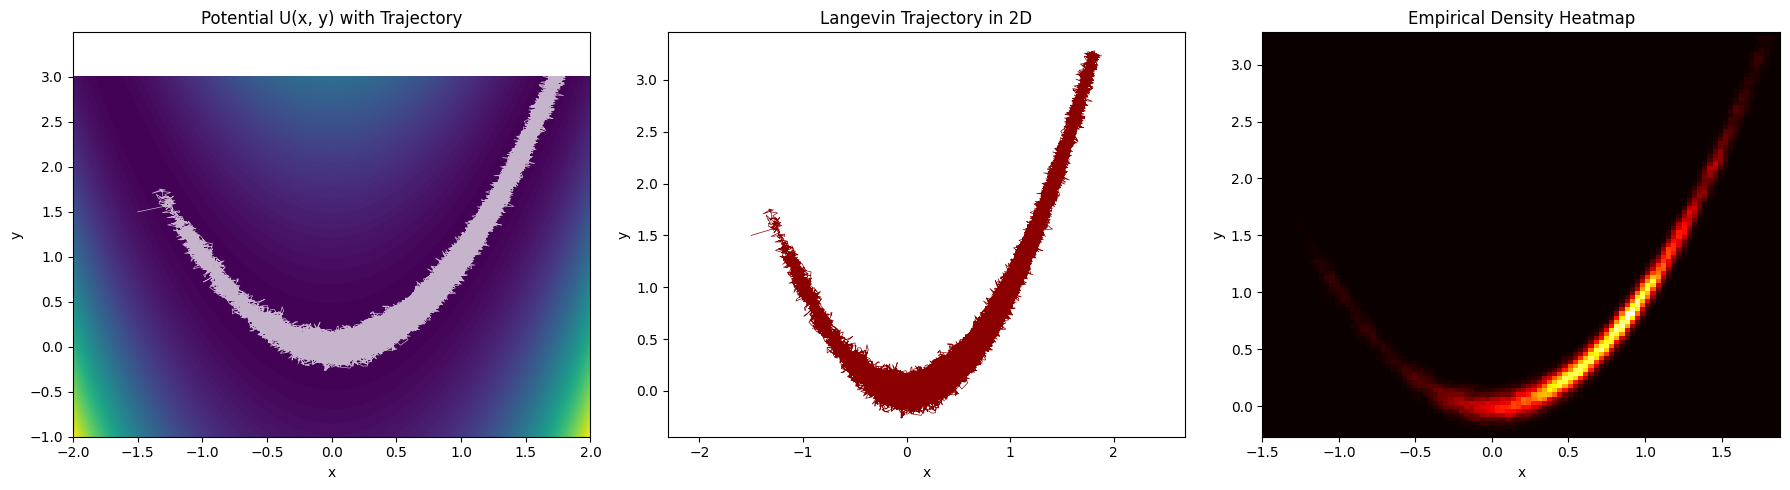

Detected transitions between basins:
  left → center: 5 times
  center → left: 4 times
  center → right: 904 times
  right → center: 903 times


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- 1. Define the complex 2D potential and its gradient ---

def U(x, y):
    """Modified Rosenbrock (banana valley) with a tilt."""
    return (1 - x)**2 + 100 * (y - x**2)**2 + 0.2 * (x**2 + y**2)

def grad_U(x, y):
    dU_dx = -2 * (1 - x) - 400 * x * (y - x**2) + 0.4 * x
    dU_dy = 200 * (y - x**2) + 0.4 * y
    return np.array([dU_dx, dU_dy])

# --- 2. Langevin dynamics parameters and initialization ---

dt = 0.0005
n_steps = 100000
sqrt_2dt = np.sqrt(2 * dt)

traj = np.zeros((n_steps, 2))
traj[0] = [-1.5, 1.5]  # Initial position

# --- 3. Simulate Langevin dynamics ---

for i in range(1, n_steps):
    grad = grad_U(*traj[i-1])
    noise = np.random.normal(size=2)
    traj[i] = traj[i-1] - grad * dt + sqrt_2dt * noise

x_traj, y_traj = traj[:, 0], traj[:, 1]

# --- 4. Visualization ---

fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Contour of potential with trajectory
x_vals = np.linspace(-2, 2, 300)
y_vals = np.linspace(-1, 3, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)
axs[0].contourf(X, Y, Z, levels=100, cmap='viridis')
axs[0].plot(x_traj, y_traj, color='white', lw=0.5, alpha=0.7)
axs[0].set_title("Potential U(x, y) with Trajectory")
axs[0].set_xlabel("x")
axs[0].set_ylabel("y")

# 2D trajectory
axs[1].plot(x_traj, y_traj, lw=0.5, color='darkred')
axs[1].set_title("Langevin Trajectory in 2D")
axs[1].set_xlabel("x")
axs[1].set_ylabel("y")
axs[1].axis('equal')

# Histogram heatmap
heatmap, xedges, yedges = np.histogram2d(x_traj, y_traj, bins=100, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
axs[2].imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', aspect='auto')
axs[2].set_title("Empirical Density Heatmap")
axs[2].set_xlabel("x")
axs[2].set_ylabel("y")

plt.tight_layout()
plt.show()

# --- 5. Barrier Crossing Detection ---

# Define basins (just bounding boxes around minima)
# These are approximate and chosen by visual inspection of the potential
wells = {
    'left':  lambda x, y: x < -0.5 and y > 0.5,
    'center': lambda x, y: -0.5 <= x <= 0.5 and 0 <= y <= 1.5,
    'right': lambda x, y: x > 0.5 and y < 1.5
}

def identify_well(x, y):
    for name, cond in wells.items():
        if cond(x, y):
            return name
    return None

# Track transitions
well_sequence = []
prev_well = identify_well(*traj[0])
if prev_well:
    well_sequence.append(prev_well)

for i in range(1, len(traj)):
    current_well = identify_well(*traj[i])
    if current_well and current_well != prev_well:
        well_sequence.append(current_well)
        prev_well = current_well

# Count transitions
from collections import Counter
transitions = list(zip(well_sequence[:-1], well_sequence[1:]))
transition_counts = Counter(transitions)

print("Detected transitions between basins:")
for (w1, w2), count in transition_counts.items():
    print(f"  {w1} → {w2}: {count} times")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter

# --- 1. Define the complex 2D potential and its gradient ---

def U(x, y):
    """Modified Rosenbrock (banana valley) with a tilt."""
    return (1 - x)**2 + 100 * (y - x**2)**2 + 0.2 * (x**2 + y**2)

def grad_U(x, y):
    dU_dx = -2 * (1 - x) - 400 * x * (y - x**2) + 0.4 * x
    dU_dy = 200 * (y - x**2) + 0.4 * y
    return np.array([dU_dx, dU_dy])

# --- 2. Langevin dynamics parameters and initialization ---

dt = 0.0005
n_steps = 100000
sqrt_2dt = np.sqrt(2 * dt)

traj = np.zeros((n_steps, 2))
traj[0] = [-1.5, 1.5]  # Initial position

# --- 3. Simulate Langevin dynamics ---

for i in range(1, n_steps):
    grad = grad_U(*traj[i-1])
    noise = np.random.normal(size=2)
    traj[i] = traj[i-1] - grad * dt + sqrt_2dt * noise

x_traj, y_traj = traj[:, 0], traj[:, 1]

# --- 4. Visualization and Saving Figures Individually ---

# Set up potential grid
x_vals = np.linspace(-2, 2, 300)
y_vals = np.linspace(-1, 3, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = U(X, Y)

# 1. Contour plot with trajectory
fig1, ax1 = plt.subplots(figsize=(6, 5))
c1 = ax1.contourf(X, Y, Z, levels=100, cmap='viridis')
ax1.plot(x_traj, y_traj, color='white', lw=0.5, alpha=0.7)
ax1.set_title("Potential U(x, y) with Trajectory")
ax1.set_xlabel("x")
ax1.set_ylabel("y")
fig1.colorbar(c1, ax=ax1)
fig1.tight_layout()
fig1.savefig("potential_with_trajectory.png", dpi=300)

# 2. 2D trajectory plot
fig2, ax2 = plt.subplots(figsize=(6, 5))
ax2.plot(x_traj, y_traj, lw=0.5, color='darkred')
ax2.set_title("Langevin Trajectory in 2D")
ax2.set_xlabel("x")
ax2.set_ylabel("y")
ax2.axis('equal')
fig2.tight_layout()
fig2.savefig("langevin_trajectory.png", dpi=300)

# 3. Empirical density heatmap
fig3, ax3 = plt.subplots(figsize=(6, 5))
heatmap, xedges, yedges = np.histogram2d(x_traj, y_traj, bins=100, density=True)
extent = [xedges[0], xedges[-1], yedges[0], yedges[-1]]
img = ax3.imshow(heatmap.T, extent=extent, origin='lower', cmap='hot', aspect='auto')
ax3.set_title("Empirical Density Heatmap")
ax3.set_xlabel("x")
ax3.set_ylabel("y")
fig3.colorbar(img, ax=ax3)
fig3.tight_layout()
fig3.savefig("empirical_density_heatmap.png", dpi=300)

plt.close('all')  # Close all figures to avoid showing them in an interactive session

# --- 5. Barrier Crossing Detection ---

# Define basins (bounding boxes)
wells = {
    'left':   lambda x, y: x < -0.5 and y > 0.5,
    'center': lambda x, y: -0.5 <= x <= 0.5 and 0 <= y <= 1.5,
    'right':  lambda x, y: x > 0.5 and y < 1.5
}

def identify_well(x, y):
    for name, cond in wells.items():
        if cond(x, y):
            return name
    return None

# Track well transitions
well_sequence = []
prev_well = identify_well(*traj[0])
if prev_well:
    well_sequence.append(prev_well)

for i in range(1, len(traj)):
    current_well = identify_well(*traj[i])
    if current_well and current_well != prev_well:
        well_sequence.append(current_well)
        prev_well = current_well

# Count and report transitions
transitions = list(zip(well_sequence[:-1], well_sequence[1:]))
transition_counts = Counter(transitions)

print("Detected transitions between basins:")
for (w1, w2), count in transition_counts.items():
    print(f"  {w1} → {w2}: {count} times")


Detected transitions between basins:
  left → center: 6 times
  center → right: 994 times
  right → center: 993 times
  center → left: 5 times


In [ ]:
# --- 6. Plot Basin Assignment Over Time ---

# Assign well labels to each time step
well_labels = [identify_well(x, y) for x, y in traj]

# Map labels to integers for plotting
label_to_int = {'left': 0, 'center': 1, 'right': 2, None: -1}
int_labels = [label_to_int[label] for label in well_labels]

# Create figure
fig4, ax4 = plt.subplots(figsize=(10, 3))
ax4.plot(np.arange(n_steps) * dt, int_labels, lw=0.5, color='blue')
ax4.set_yticks([0, 1, 2])
ax4.set_yticklabels(['left', 'center', 'right'])
ax4.set_xlabel("Time")
ax4.set_ylabel("Well")
ax4.set_title("Basin Occupancy Over Time")
fig4.tight_layout()
fig4.savefig("basin_occupancy_over_time.png", dpi=300)
plt.close(fig4)
